# K-Nearest Neighbors (Iris Species Prediction)

## Explanation

### Objective

Create a machine learning model that can predict Iris Species, using the K-Nearest Neighbors (KNN) Algorithm.

### Column Descriptions

- ***Id*** = Iris data number
- ***SepalLengthCm*** = Iris sepal length (cm)
- ***SepalWidthCm*** = Iris sepal width (cm)
- ***PetalLengthCm*** = Iris petal length (cm)
- ***PetalWidthCm*** = Iris petal width (cm)
- ***Species (Target)*** = Iris species (Setosa / Versicolor / Virginica)

## A. Data Preparation

### A.1 Import Libraries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [76]:
try:
    df = pd.read_csv('iris_knn.csv')
    print("Success Loading Data")
except Exception as e:
    print("Failed Loading Data")

Success Loading Data


### A.3 Viewing Data Dimensions

In [77]:
df.shape

(150, 6)

### A.4 Viewing Data Informations

In [78]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    str    
dtypes: float64(4), int64(1), str(1)
memory usage: 7.2 KB


### A.5 Viewing Data Statistics

In [79]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare', axis=1)

,count,mean,std,min,25%,50%,75%,max
Id,150.00,75.50,43.45,1.00,38.25,75.50,112.75,150.00
SepalLengthCm,150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90
SepalWidthCm,150.00,3.05,0.43,2.00,2.80,3.00,3.30,4.40
PetalLengthCm,150.00,3.76,1.76,1.00,1.60,4.35,5.10,6.90
PetalWidthCm,150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [80]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### A.7 Viewing Duplicated Data

In [82]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [83]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### A.9 Viewing Outlier Data

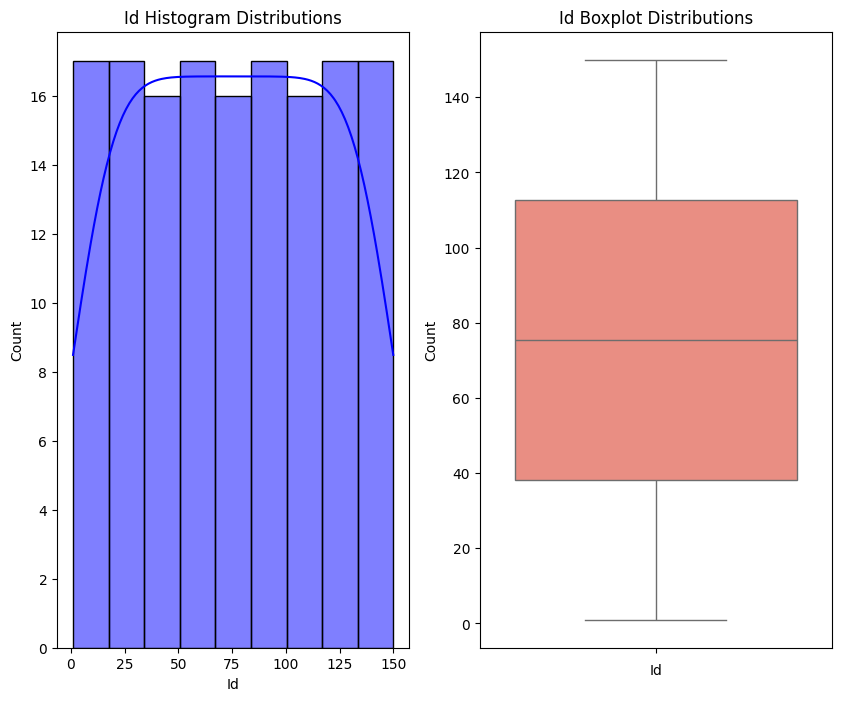

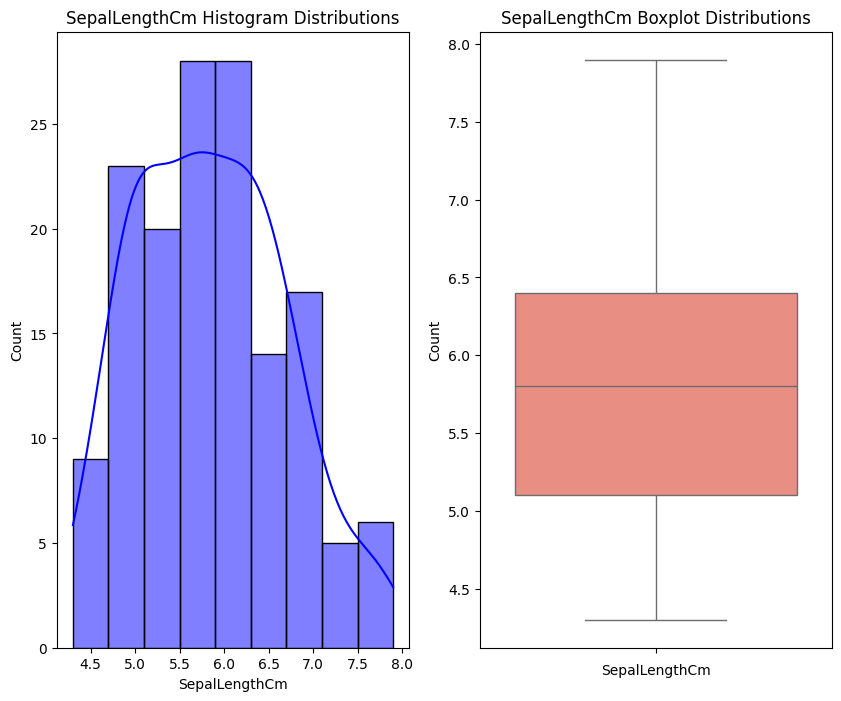

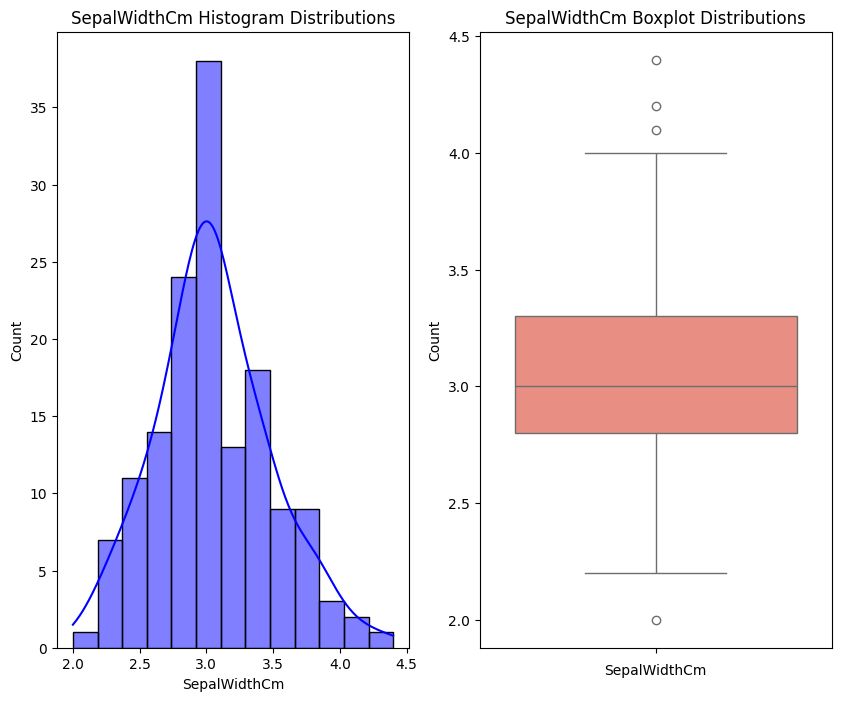

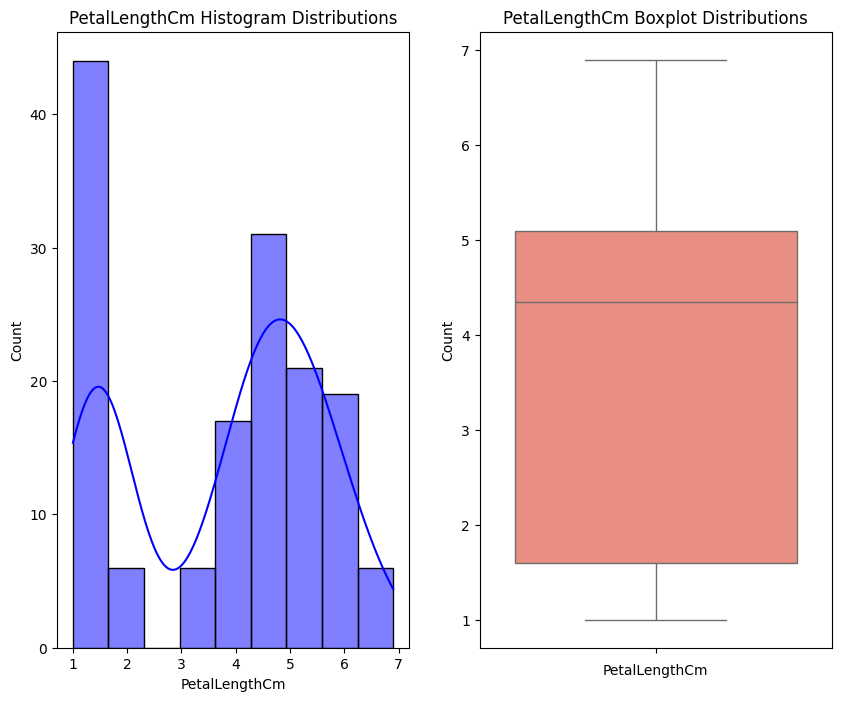

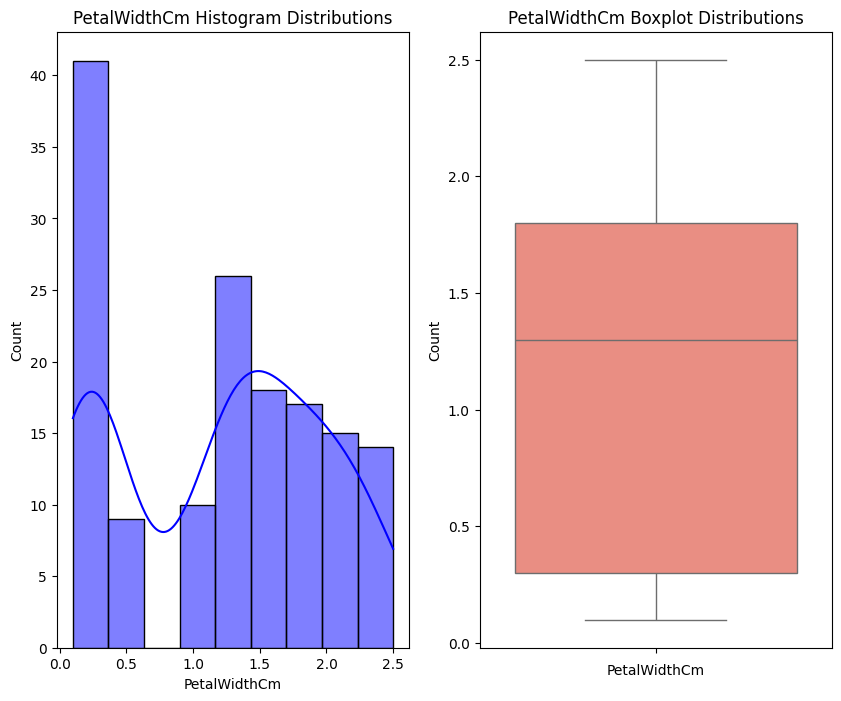

In [84]:
for col in df.select_dtypes(include='number').columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    
    sns.histplot(df[col], ax=axes[0], kde=True, color='blue')
    axes[0].set_title(f"{col} Histogram Distributions")
    axes[0].set_xlabel(f"{col}")
    axes[0].set_ylabel("Count")
    
    sns.boxplot(df[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"{col} Boxplot Distributions")
    axes[1].set_xlabel(f"{col}")
    axes[1].set_ylabel("Count")

## B. Data Preprocessing

### B.1 Handling Outliers

In [85]:
num = df.select_dtypes(include='number').columns
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    if IQR > 0:
        low_b = Q1 - 1.5 * IQR
        upp_b = Q3 + 1.5 * IQR
        
        df_clean = df[(df[col] > low_b) & (df[col] < upp_b)]

In [86]:
df_clean.shape

(150, 6)

### B.2 Drop Unrelated Column

In [87]:
df_clean.drop(columns=['Id'], inplace=True)

In [88]:
df_clean.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### B.3 Mapping Target

In [89]:
df_clean['Species'].unique()

<StringArray>
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Length: 3, dtype: str

In [90]:
species_mapping = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}
df_clean['Species'] = df_clean['Species'].map(species_mapping)

In [91]:
df_clean.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### B.4 Feature Engineering

#### Adding New Column

Sepal Area (Cm) & Petal Area (Cm)

In [92]:
df_clean['SepalAreaCm'] = df_clean['SepalLengthCm'] * df_clean['SepalWidthCm']
df_clean['PetalAreaCm'] = df_clean['PetalLengthCm'] * df_clean['PetalWidthCm']

In [93]:
df_clean.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalAreaCm,PetalAreaCm
0,5.1,3.5,1.4,0.2,0,17.85,0.28
1,4.9,3.0,1.4,0.2,0,14.70,0.28
2,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5.0,3.6,1.4,0.2,0,18.00,0.28


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Iris Species Distributions

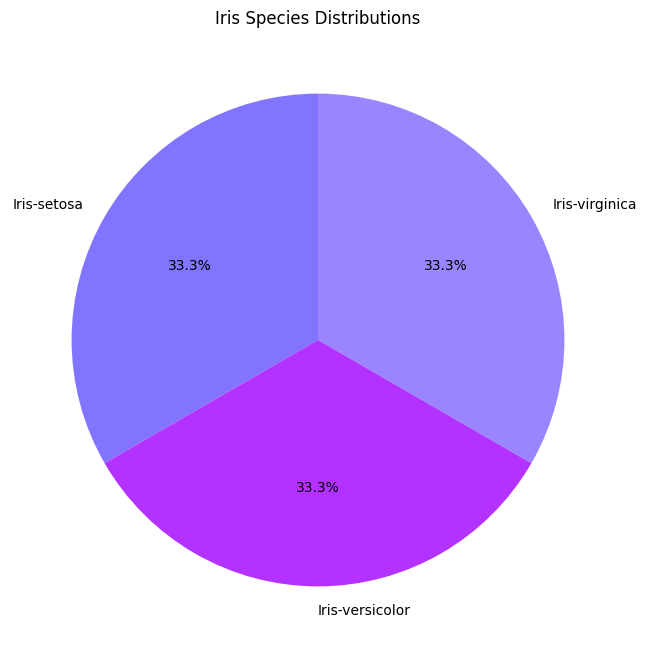

In [94]:
plt.figure(figsize=(10, 8))
df['Species'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#8175ff", "#b432ff", "#7c5effc3"], startangle=90)
plt.title("Iris Species Distributions")
plt.show()

#### Iris Sepal & Petal Distributions

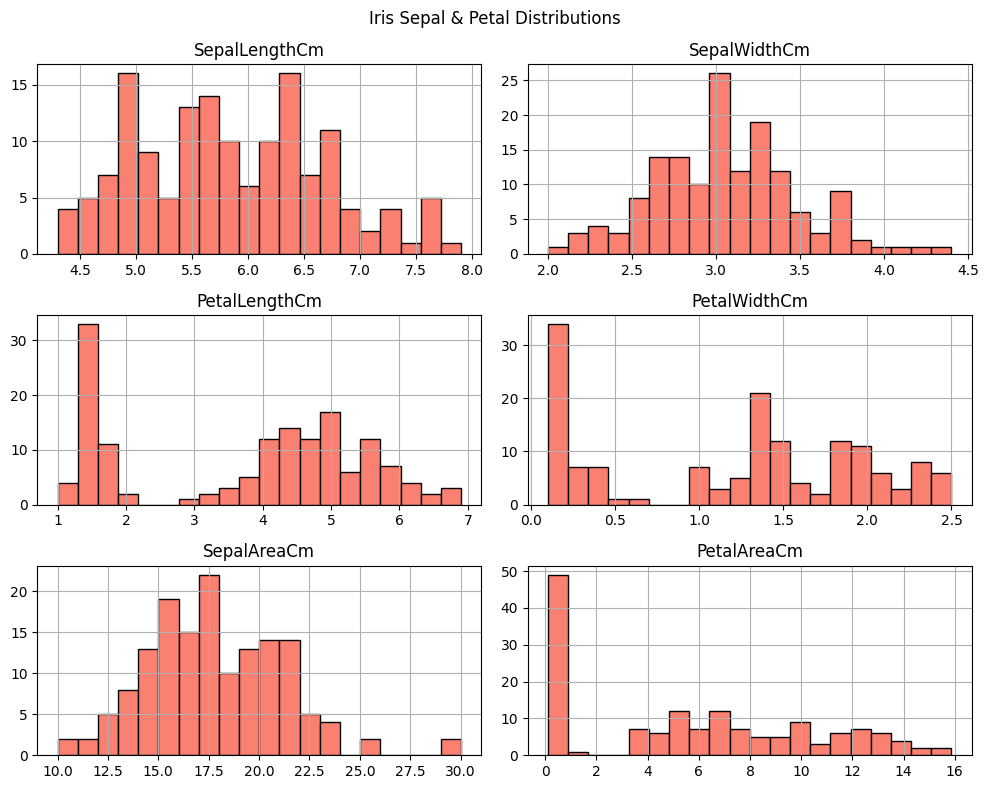

In [95]:
df_petal_sepal = df_clean.drop(columns='Species')

df_petal_sepal.hist(bins=20, color='salmon', edgecolor='black', figsize=(10, 8))
plt.suptitle("Iris Sepal & Petal Distributions")
plt.tight_layout()
plt.show()

### C.2 Bivariate Analysis

#### Iris Species Petal & Sepal Area Comparison

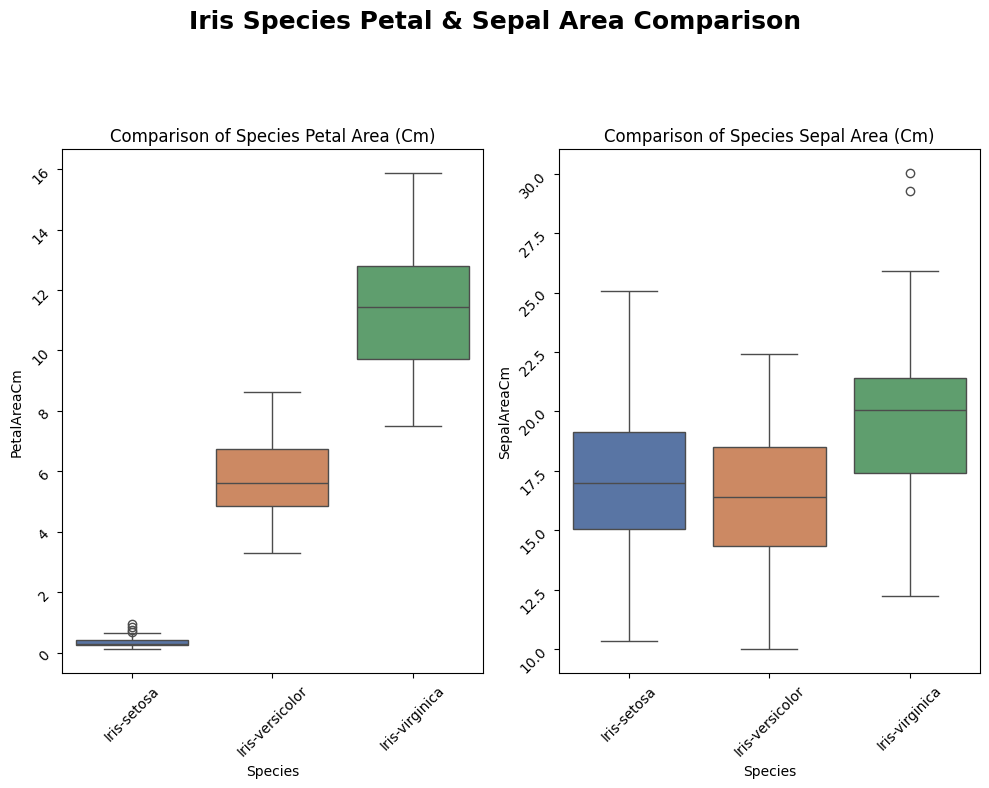

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
sns.boxplot(x=df['Species'], y=df_clean['PetalAreaCm'], ax=axes[0], palette='deep', hue=df['Species'])
axes[0].set_title('Comparison of Species Petal Area (Cm)')
axes[0].tick_params(rotation=45)

sns.boxplot(x=df['Species'], y=df_clean['SepalAreaCm'], ax=axes[1], palette='deep', hue=df['Species'])
axes[1].set_title('Comparison of Species Sepal Area (Cm)')
axes[1].tick_params(rotation=45)

plt.suptitle("Iris Species Petal & Sepal Area Comparison", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

#### Iris Species Petal Length & Width Comparison

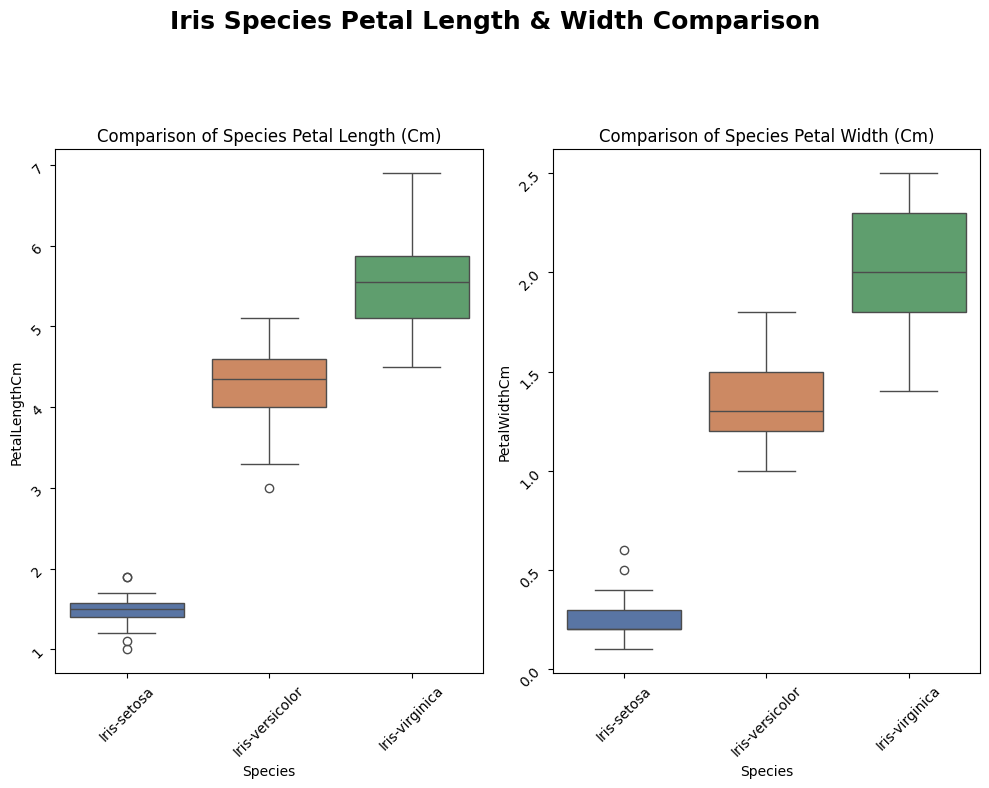

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
sns.boxplot(x=df['Species'], y=df_clean['PetalLengthCm'], ax=axes[0], palette='deep', hue=df['Species'])
axes[0].set_title('Comparison of Species Petal Length (Cm)')
axes[0].tick_params(rotation=45)

sns.boxplot(x=df['Species'], y=df_clean['PetalWidthCm'], ax=axes[1], palette='deep', hue=df['Species'])
axes[1].set_title('Comparison of Species Petal Width (Cm)')
axes[1].tick_params(rotation=45)

plt.suptitle("Iris Species Petal Length & Width Comparison", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

#### Iris Species Sepal Length & Width Comparison

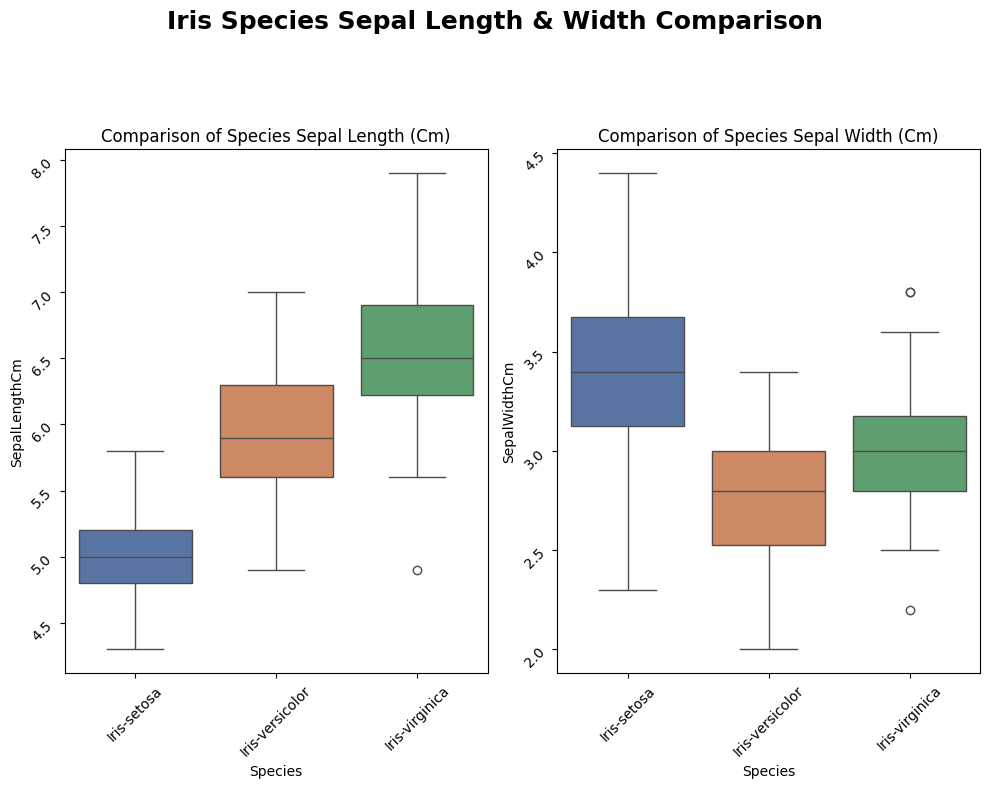

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
sns.boxplot(x=df['Species'], y=df_clean['SepalLengthCm'], ax=axes[0], palette='deep', hue=df['Species'])
axes[0].set_title('Comparison of Species Sepal Length (Cm)')
axes[0].tick_params(rotation=45)

sns.boxplot(x=df['Species'], y=df_clean['SepalWidthCm'], ax=axes[1], palette='deep', hue=df['Species'])
axes[1].set_title('Comparison of Species Sepal Width (Cm)')
axes[1].tick_params(rotation=45)

plt.suptitle("Iris Species Sepal Length & Width Comparison", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

#### Iris Species Comparison

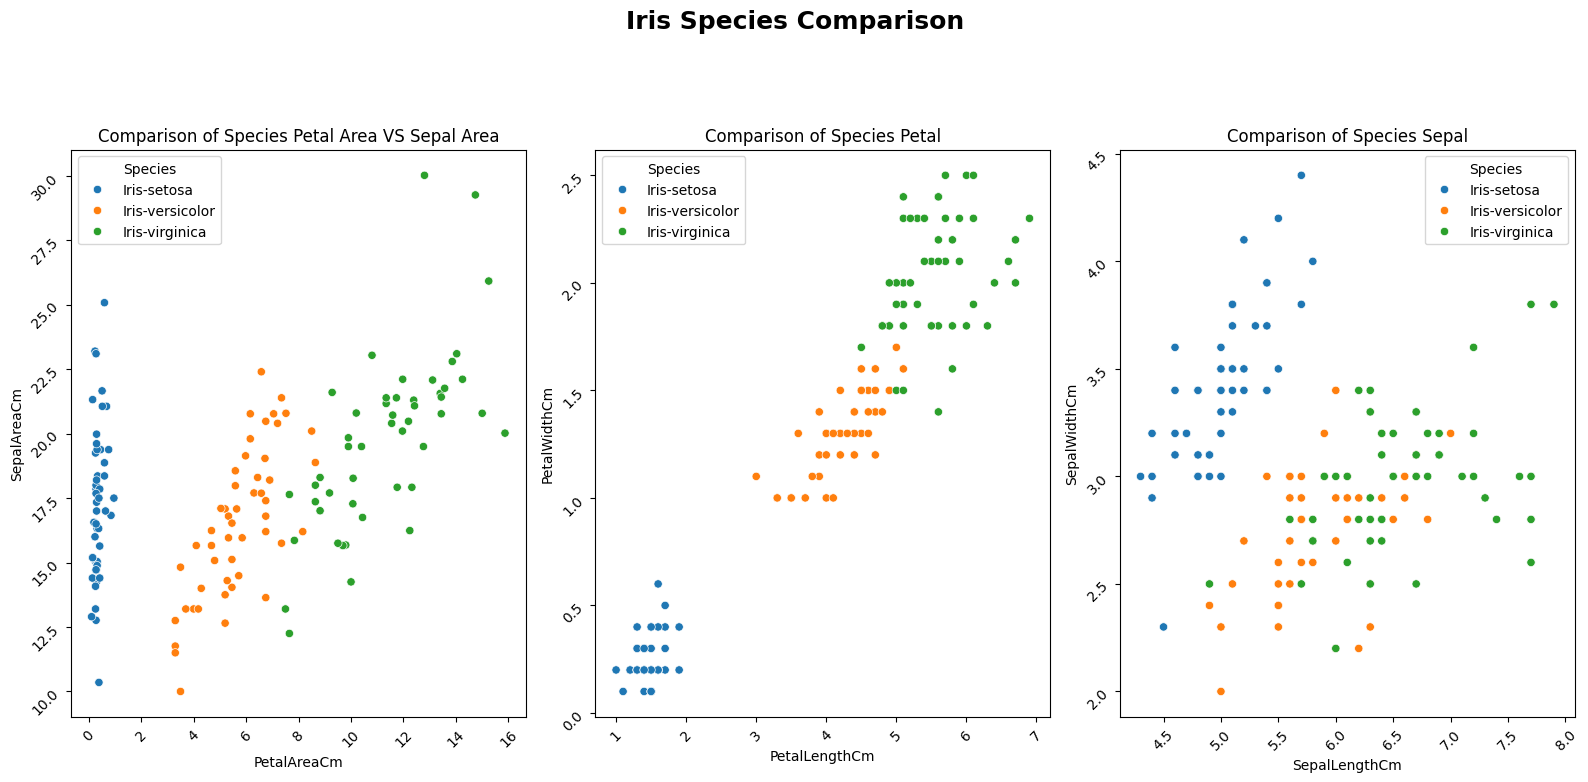

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

sns.scatterplot(x=df_clean['PetalAreaCm'], y=df_clean['SepalAreaCm'], ax=axes[0], hue=df['Species'])
axes[0].set_title('Comparison of Species Petal Area VS Sepal Area')
axes[0].tick_params(rotation=45)

sns.scatterplot(x=df_clean['PetalLengthCm'], y=df_clean['PetalWidthCm'], ax=axes[1], hue=df['Species'])
axes[1].set_title('Comparison of Species Petal')
axes[1].tick_params(rotation=45)

sns.scatterplot(x=df_clean['SepalLengthCm'], y=df_clean['SepalWidthCm'], ax=axes[2], hue=df['Species'])
axes[2].set_title('Comparison of Species Sepal')
axes[2].tick_params(rotation=45)

plt.suptitle("Iris Species Comparison", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

### C.3 Multivariate Analysis

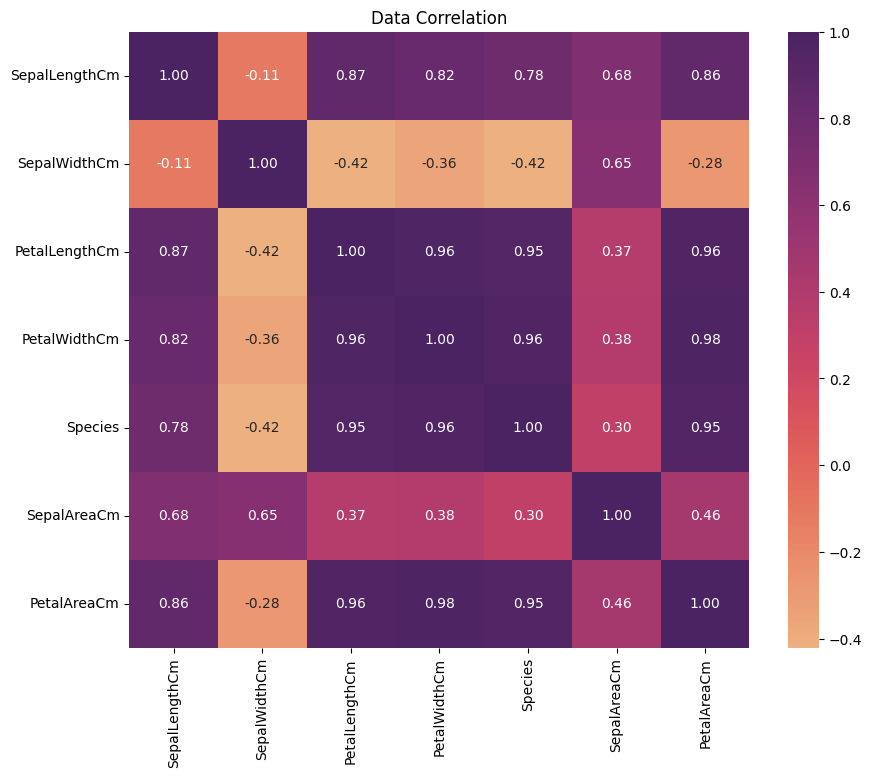

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='flare', fmt='.2f')
plt.title("Data Correlation")
plt.show()

## D. Modelling

### D.1 Defining Features (X) and Target (y) Variables

In [101]:
X_data = df_clean.drop(columns=['Species'])
y_data = df_clean['Species']

### D.2 Splitting Test Data and Train Data (80 : 20)

In [102]:
def stratified_split(X_data, y_data, train_size = 0.8, random_state=42):
    np.random.seed(42)
    
    X_train_list, X_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx =np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

In [103]:
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

In [104]:
print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")

X Train Shape: (120, 6)
X Test Shape: (30, 6)


### D.3 Feature Scaling

#### Standard Scaler for Continous Data

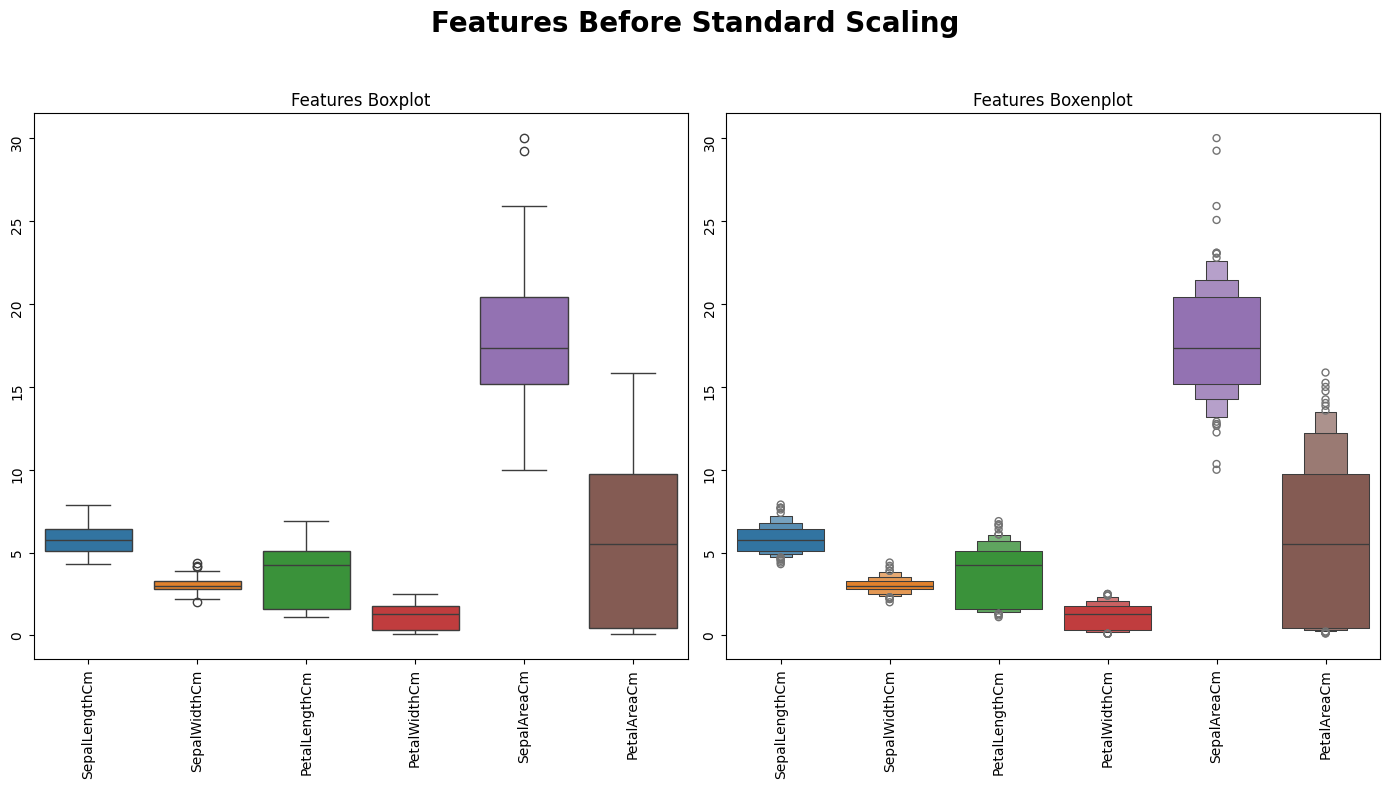

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.boxplot(X_train, ax=axes[0])
axes[0].tick_params(rotation=90)
axes[0].set_title("Features Boxplot")

sns.boxenplot(X_train, ax=axes[1])
axes[1].tick_params(rotation=90)
axes[1].set_title("Features Boxenplot")

plt.suptitle("Features Before Standard Scaling", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [106]:
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

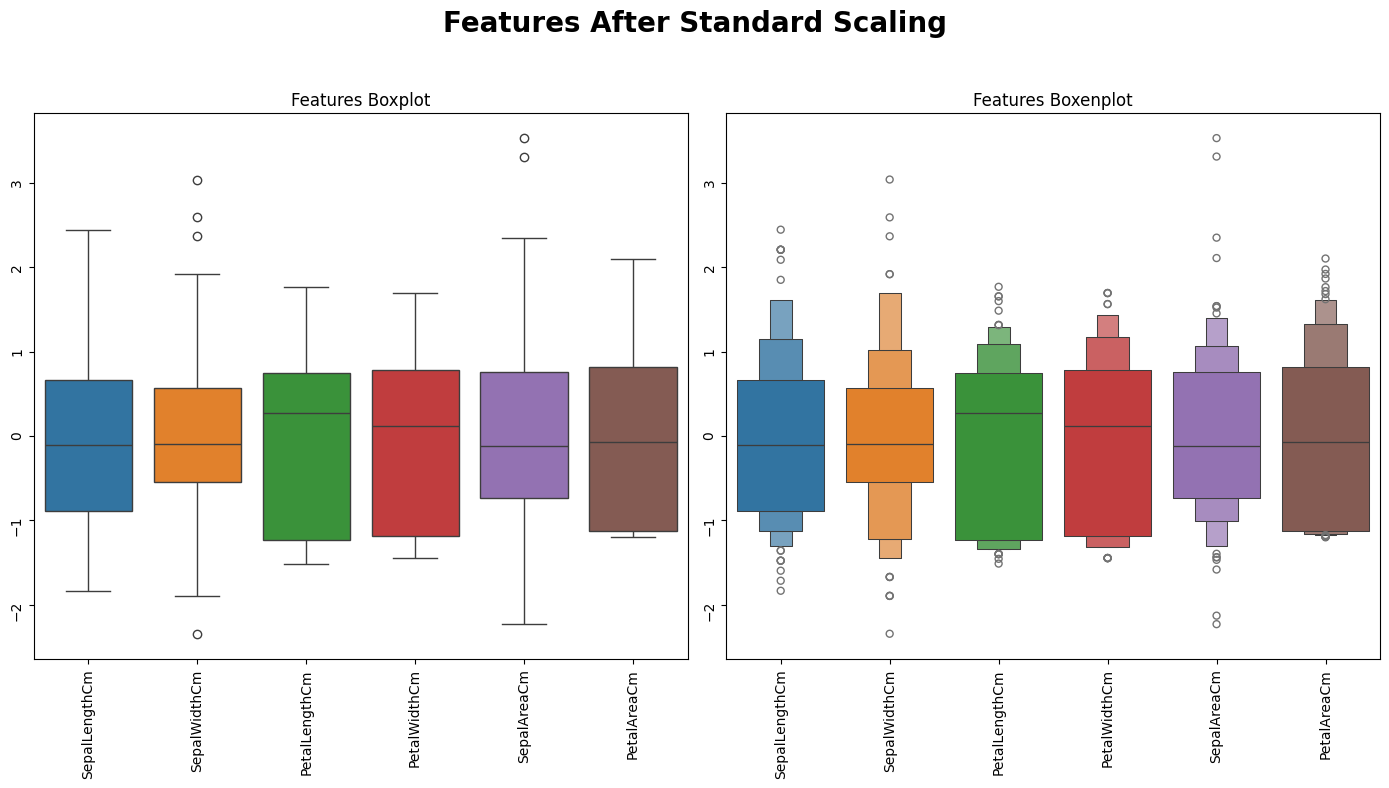

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.boxplot(X_train, ax=axes[0])
axes[0].tick_params(rotation=90)
axes[0].set_title("Features Boxplot")

sns.boxenplot(X_train, ax=axes[1])
axes[1].tick_params(rotation=90)
axes[1].set_title("Features Boxenplot")

plt.suptitle("Features After Standard Scaling", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### D.4 K-Nearest Neighbors

In [108]:
class KNN:
    def __init__(self, k, p, weights):
        self.P = p
        self.K = k
        self.Weights = weights
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, x1, x2):
        diff = np.abs(x1 - x2)
        axis_val = 1 if x1.ndim > 1 else 0
        
        if self.P == 1:
            return np.sum(diff, axis=axis_val)
        elif self.P == 2:
            return np.sqrt(np.sum(diff ** 2, axis=axis_val))
        elif self.P == float('inf') or self.P == 'chebyshev':
            return np.max(diff, axis=axis_val)
        else:
            return np.power(np.sum(diff ** self.P, axis=axis_val), 1/self.P)
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        dists = self.distance(self.X_train, x)
        best_k = np.argsort(dists)[:self.K]
        label_k = self.y_train[best_k]
        
        if self.Weights == 'uniform':
            values, counts = np.unique(label_k, return_counts=True)
            return values[np.argmax(counts)]
        
        elif self.Weights == 'distance':
            weights = 1 / (dists[best_k] + 1e-6)
            vote_scores = {}
            
            for label, weight in zip(label_k, weights):
                vote_scores[label] = vote_scores.get(label, 0) + weight
            return max(vote_scores, key=vote_scores.get)
        

### D.5 Grid Search (Finding Optimal K, Distance, and Weight Method)

#### Grid Search Test Predictions

In [109]:
print("|   K   |   Jarak   |  Accuracy  |    Weights    |")

best_acc = 0
best_params  = {}

for k in [3, 5, 7, 9, 11, 13, 15]:
    for p in [1, 2, 'chebyshev']:
        for w in ['uniform', 'distance']:
            model = KNN(k, p, w)
            model.fit(X_train.values, y_train.values)
            pred = model.predict(X_test.values)
            acc = np.mean(pred == y_test.values)
            
            if p == 1:
                dist = 'Manhattan'
            elif p == 2:
                dist = 'Euclidean'
            else:
                dist = 'Chebyshev'
                
            print(f"|   {k}   | {dist} |    {acc:.2f}    |    {w}    |")
            if acc > best_acc:
                best_acc = acc
                best_params = {'k' : k, 'p' : p, 'w' : w}
                
if best_params['p'] == 1:
    dist_name = 'Manhattan'
elif best_params['p'] == 2:
    dist_name = 'Euclidean'
else:
    dist_name = 'Chebyshev'
print(f"Best K: {best_params['k']} | Best Distance: {dist_name} | Best Weights: {best_params['w']} | Best Accuracy: {best_acc:.2f}")

|   K   |   Jarak   |  Accuracy  |    Weights    |
|   3   | Manhattan |    0.97    |    uniform    |
|   3   | Manhattan |    0.97    |    distance    |
|   3   | Euclidean |    0.97    |    uniform    |
|   3   | Euclidean |    0.97    |    distance    |
|   3   | Chebyshev |    0.93    |    uniform    |
|   3   | Chebyshev |    0.97    |    distance    |
|   5   | Manhattan |    0.97    |    uniform    |
|   5   | Manhattan |    0.97    |    distance    |
|   5   | Euclidean |    1.00    |    uniform    |
|   5   | Euclidean |    0.97    |    distance    |
|   5   | Chebyshev |    0.97    |    uniform    |
|   5   | Chebyshev |    0.97    |    distance    |
|   7   | Manhattan |    0.97    |    uniform    |
|   7   | Manhattan |    0.97    |    distance    |
|   7   | Euclidean |    0.97    |    uniform    |
|   7   | Euclidean |    1.00    |    distance    |
|   7   | Chebyshev |    0.97    |    uniform    |
|   7   | Chebyshev |    0.97    |    distance    |
|   9   | Manhattan | 

#### Grid Search Train Predictions

In [110]:
print("|   K   |   Jarak   |  Akurasi  |    Weights    |")

best_acc = 0
best_params  = {}

for k in [3, 5, 7, 9, 11, 13, 15]:
    for p in [1, 2, 'chebyshev']:
        for w in ['uniform', 'distance']:
            model = KNN(k, p, w)
            model.fit(X_train.values, y_train.values)
            pred = model.predict(X_train.values)
            acc = np.mean(pred == y_train.values)
            
            if p == 1:
                dist = 'Manhattan'
            elif p == 2:
                dist = 'Euclidean'
            else:
                dist = 'Chebyshev'
                
            print(f"|   {k}   | {dist} |    {acc:.2f}    |    {w}    |")
            if acc > best_acc:
                best_acc = acc
                best_params = {'k' : k, 'p' : p, 'w' : w}
                
if best_params['p'] == 1:
    dist_name = 'Manhattan'
elif best_params['p'] == 2:
    dist_name = 'Euclidean'
else:
    dist_name = 'Chebyshev'
print(f"Best K: {best_params['k']} | Best Distance: {dist_name} | Best Weights: {best_params['w']} | Best Accuracy: {best_acc:.2f}")

|   K   |   Jarak   |  Akurasi  |    Weights    |
|   3   | Manhattan |    0.97    |    uniform    |
|   3   | Manhattan |    1.00    |    distance    |
|   3   | Euclidean |    0.97    |    uniform    |
|   3   | Euclidean |    1.00    |    distance    |
|   3   | Chebyshev |    0.96    |    uniform    |
|   3   | Chebyshev |    1.00    |    distance    |
|   5   | Manhattan |    0.96    |    uniform    |
|   5   | Manhattan |    1.00    |    distance    |
|   5   | Euclidean |    0.97    |    uniform    |
|   5   | Euclidean |    1.00    |    distance    |
|   5   | Chebyshev |    0.97    |    uniform    |
|   5   | Chebyshev |    1.00    |    distance    |
|   7   | Manhattan |    0.97    |    uniform    |
|   7   | Manhattan |    1.00    |    distance    |
|   7   | Euclidean |    0.97    |    uniform    |
|   7   | Euclidean |    1.00    |    distance    |
|   7   | Chebyshev |    0.96    |    uniform    |
|   7   | Chebyshev |    1.00    |    distance    |
|   9   | Manhattan |  

Setelah melakukan Grid Search menggunakan kedua data (Test dan Train)

Test:
- Akurasi Maksimal = 100%
- Parameter = K: 5 | Distance: Euclidean | Weights: uniform |

Train:
- Akurasi Maksimal = 100%
- Parameter = K: 3 | Distance: Manhattan | Weights: distance |


### D.6 Elbow Method (Viewing Model Error Rate)

#### Every Distances Error Rate (Uniform Method)

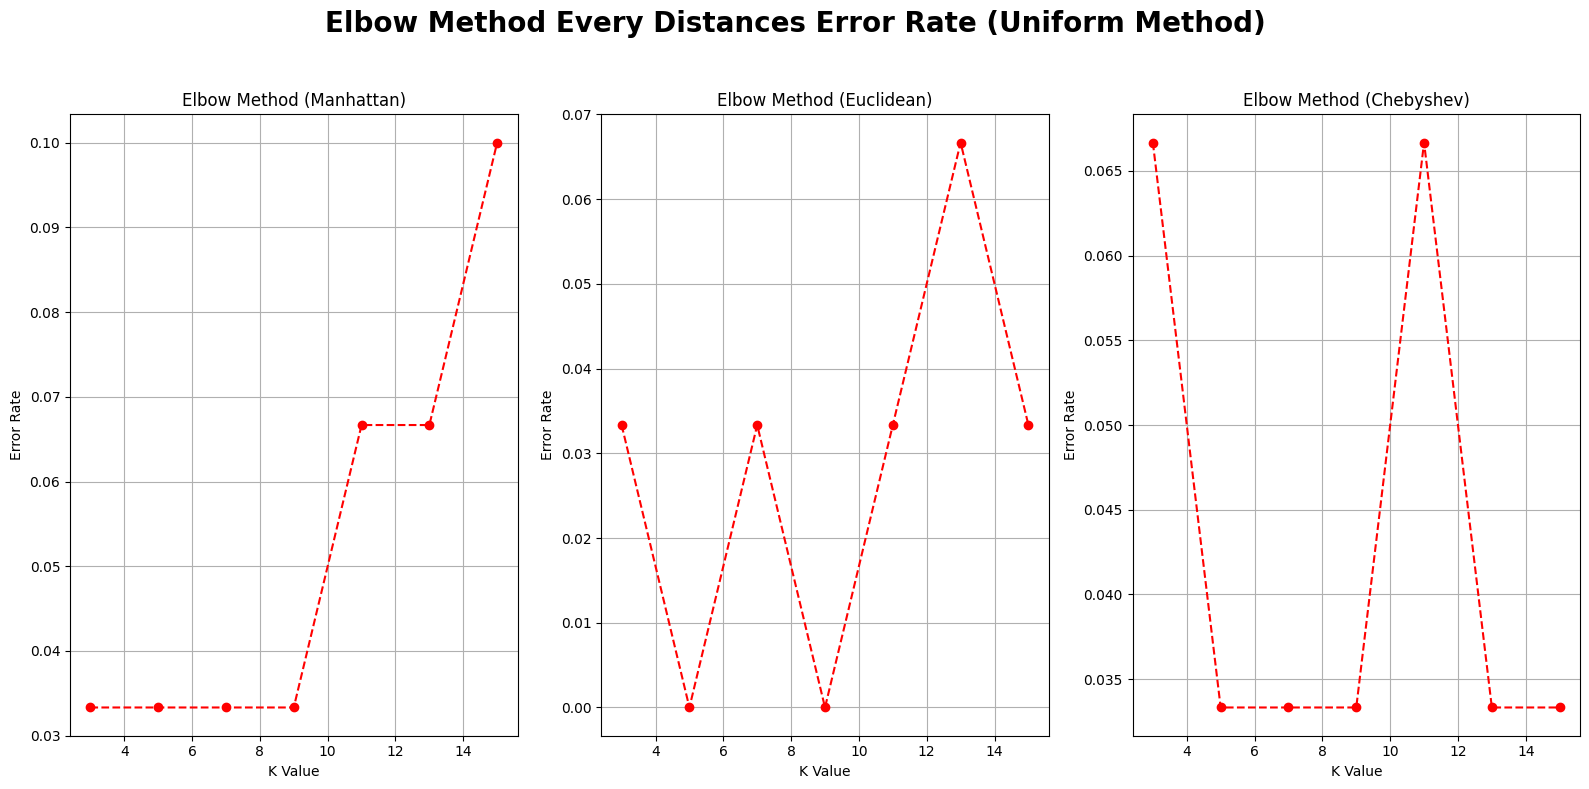

In [111]:
distances = [(1, "Manhattan"), (2, "Euclidean"), ('chebyshev', 'Chebyshev')]
range_k = [3, 5, 7, 9, 11, 13, 15]

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
for i, (p, name) in enumerate(distances):
    errors = []
    for k in range_k:
        model = KNN(k, p, 'uniform')
        model.fit(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
    axes[i].plot(range_k, errors, marker='o', linestyle='--', color='red')
    axes[i].set_title(f"Elbow Method ({name})")
    axes[i].set_xlabel("K Value")
    axes[i].set_ylabel("Error Rate")
    axes[i].grid(True)
    
plt.suptitle("Elbow Method Every Distances Error Rate (Uniform Method)", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Every Distances Error Rate (Distance Method)

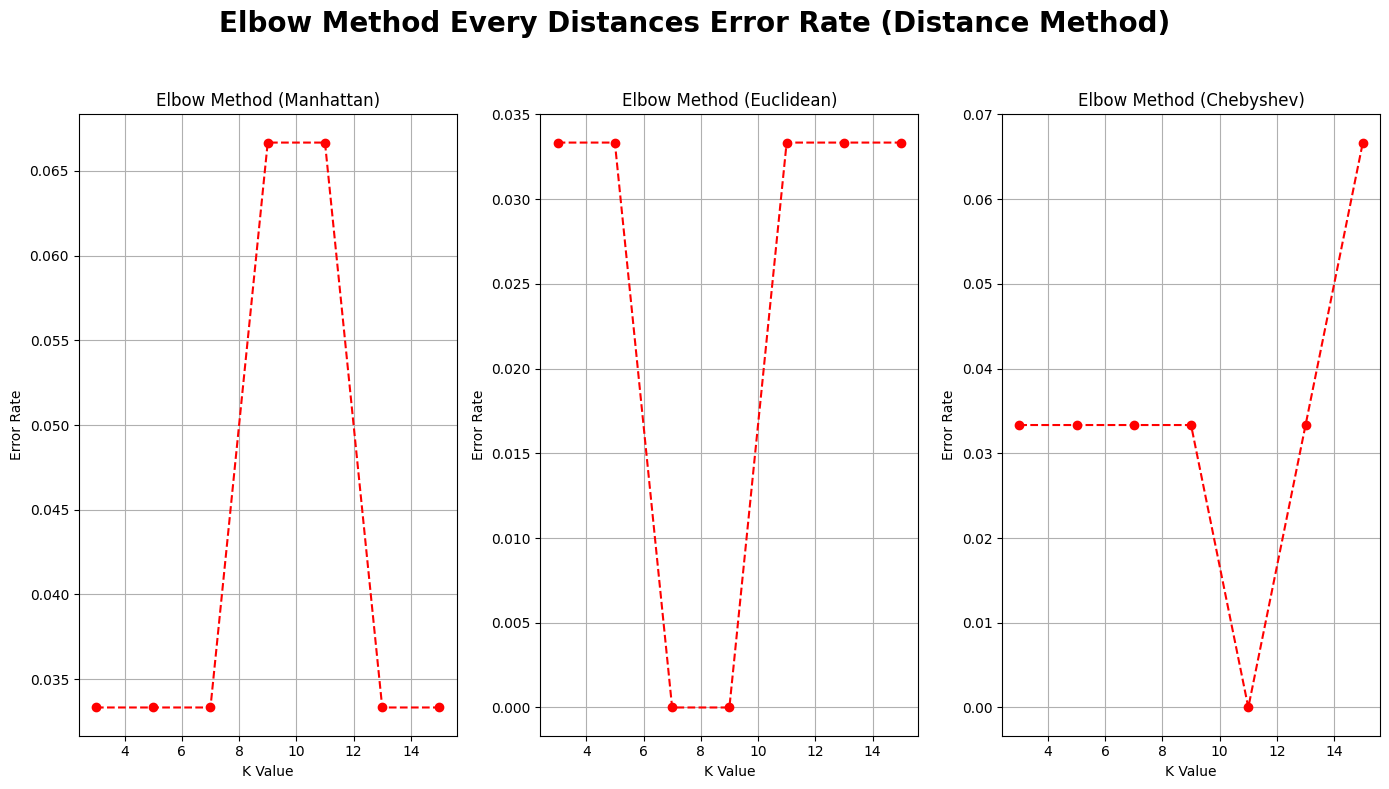

In [112]:
distances = [(1, "Manhattan"), (2, "Euclidean"), ('chebyshev', 'Chebyshev')]
range_k = [3, 5, 7, 9, 11, 13, 15]

fig, axes = plt.subplots(1, 3, figsize=(14, 8))
for i, (p, name) in enumerate(distances):
    errors = []
    for k in range_k:
        model = KNN(k, p, 'distance')
        model.fit(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
    axes[i].plot(range_k, errors, marker='o', linestyle='--', color='red')
    axes[i].set_title(f"Elbow Method ({name})")
    axes[i].set_xlabel("K Value")
    axes[i].set_ylabel("Error Rate")
    axes[i].grid(True)
    
plt.suptitle("Elbow Method Every Distances Error Rate (Distance Method)", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Berdasarkan kedua grafik di atas, Euclidean Distance (Distance Method) memberikan error rate terendah dibanding Manhattan & Chebyshev. K=7 dipilih sebagai titik optimum karena memiliki error rate terendah.

### D.7 Validation Curve (Finding Optimum Gap)

#### Every Distances Validation Curve (Uniform Method)

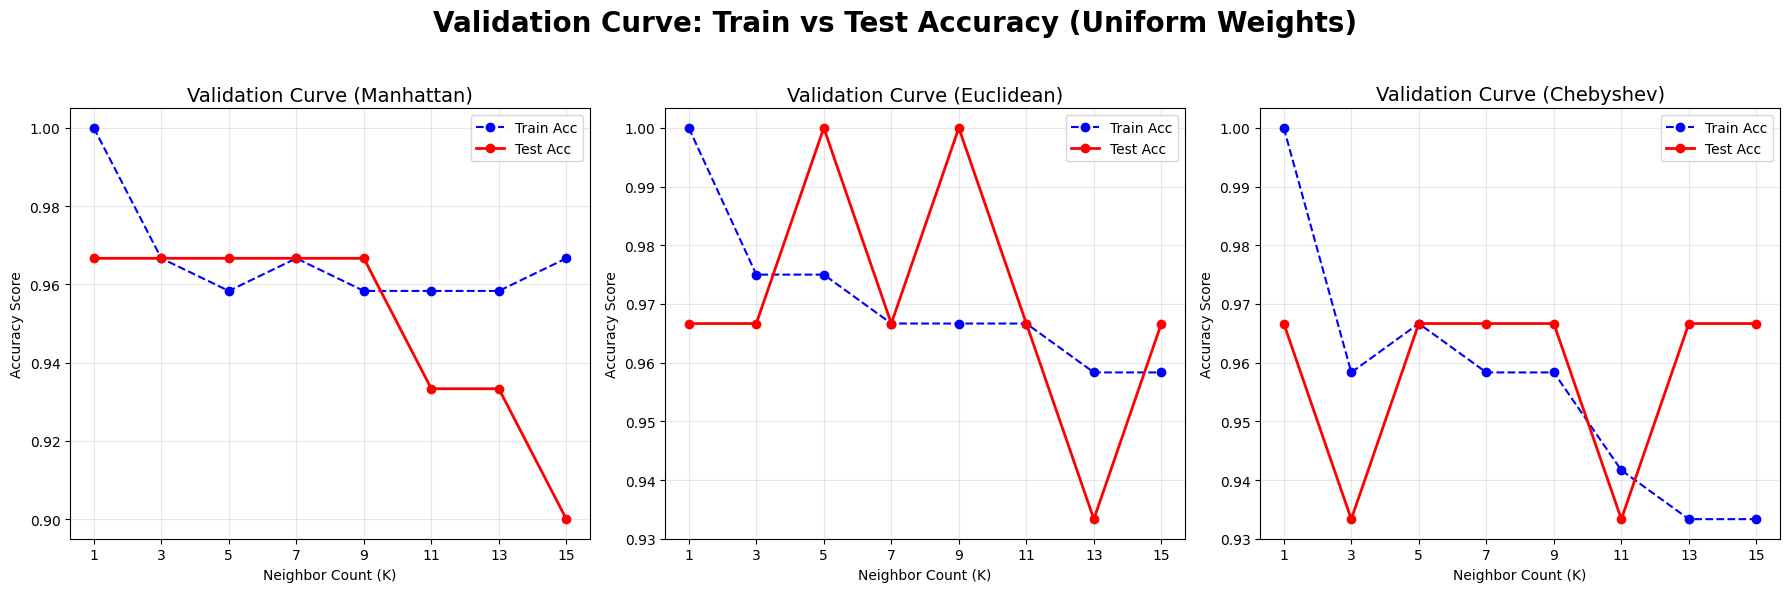

In [113]:
distances = [
    (1, "Manhattan"), 
    (2, "Euclidean"), 
    ('chebyshev', "Chebyshev")
]
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (p, name) in enumerate(distances):
    train_accuracies = []
    test_accuracies = []
    
    for k in k_values:
        model = KNN(k, p, 'uniform')
        model.fit(X_train.values, y_train.values)
        
        train_pred = model.predict(X_train.values)
        train_acc = np.mean(train_pred == y_train.values)
        train_accuracies.append(train_acc)
        
        test_pred = model.predict(X_test.values)
        test_acc = np.mean(test_pred == y_test.values)
        test_accuracies.append(test_acc)
    
    axes[i].plot(k_values, train_accuracies, marker='o', linestyle='--', color='blue', label='Train Acc')
    axes[i].plot(k_values, test_accuracies, marker='o', linewidth=2, color='red', label='Test Acc')
    
    axes[i].set_title(f"Validation Curve ({name})", fontsize=14)
    axes[i].set_xlabel("Neighbor Count (K)")
    axes[i].set_ylabel("Accuracy Score")
    axes[i].set_xticks(k_values)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle("Validation Curve: Train vs Test Accuracy (Uniform Weights)", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Every Distances Validation Curve (Distance Method)

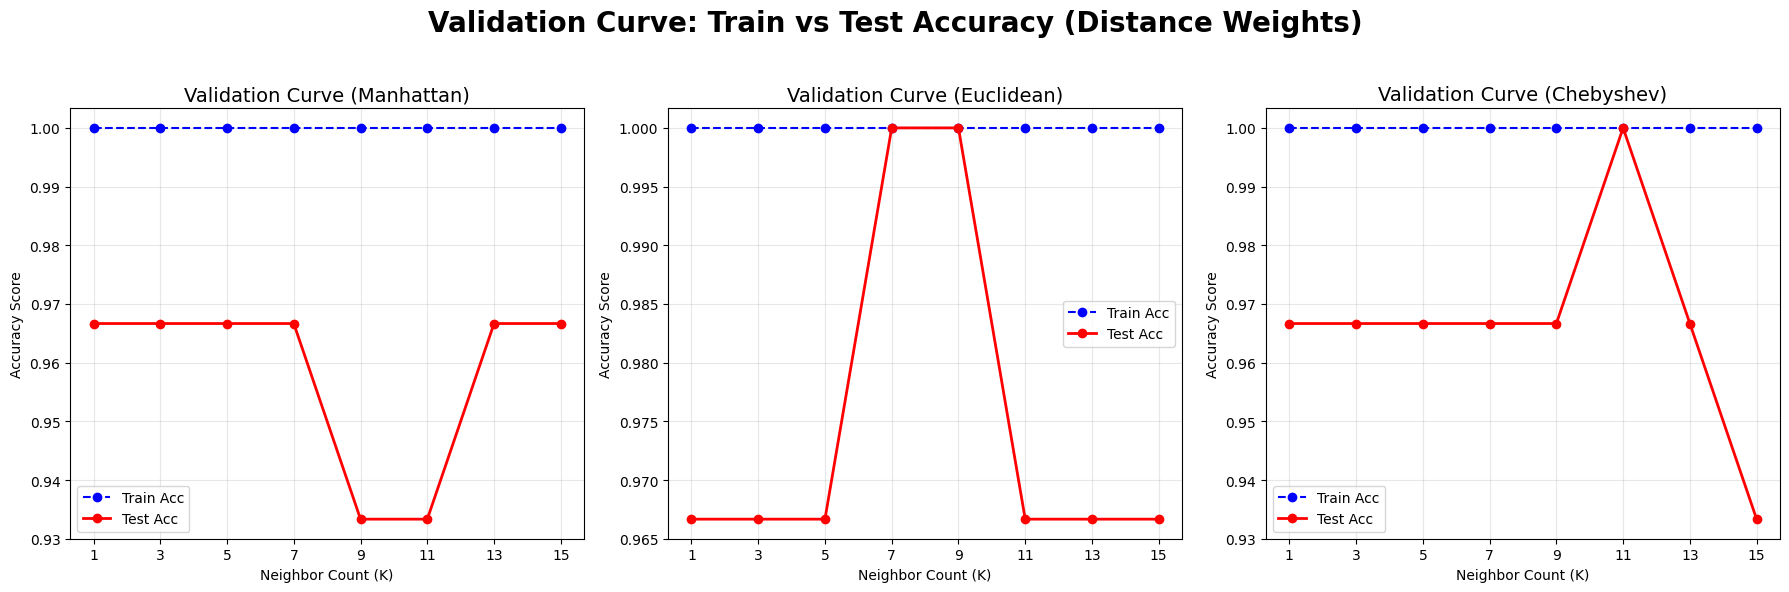

In [114]:
distances = [
    (1, "Manhattan"), 
    (2, "Euclidean"), 
    ('chebyshev', "Chebyshev")
]
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (p, name) in enumerate(distances):
    train_accuracies = []
    test_accuracies = []

    for k in k_values:
        model = KNN(k, p, 'distance')
        model.fit(X_train.values, y_train.values)
        
        train_pred = model.predict(X_train.values)
        train_acc = np.mean(train_pred == y_train.values)
        train_accuracies.append(train_acc)
        
        test_pred = model.predict(X_test.values)
        test_acc = np.mean(test_pred == y_test.values)
        test_accuracies.append(test_acc)
    
    axes[i].plot(k_values, train_accuracies, marker='o', linestyle='--', color='blue', label='Train Acc')
    axes[i].plot(k_values, test_accuracies, marker='o', linewidth=2, color='red', label='Test Acc')
    
    axes[i].set_title(f"Validation Curve ({name})", fontsize=14)
    axes[i].set_xlabel("Neighbor Count (K)")
    axes[i].set_ylabel("Accuracy Score")
    axes[i].set_xticks(k_values)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle("Validation Curve: Train vs Test Accuracy (Distance Weights)", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Berdasarkan kedua grafik di atas, Euclidean Distance (Distance Method) memberikan stabilitas terbaik dibanding Manhattan & Chebyshev. K=7 dipilih sebagai titik optimum karena memiliki akurasi tes tinggi dengan gap overfitting yang minim.

### D.8 Predict With Best K and Distance Method

In [115]:
model = KNN(7, 2, 'distance')
model.fit(X_train.values, y_train.values)

test_predictions = model.predict(X_test.values)
train_predictions = model.predict(X_train.values)

## E. Evaluation

### E.1 Model Accuracy

#### Test Accuracy

In [116]:
test_accuracy = np.mean(test_predictions == y_test.values)
print(f"Accuracy (Test): {test_accuracy:.2f}")

Accuracy (Test): 1.00


#### Train Accuracy

In [117]:
train_accuracy = np.mean(train_predictions == y_train.values)
print(f"Accuracy (Train): {train_accuracy:.2f}")

Accuracy (Train): 1.00


### E.2 Confusion Matrix

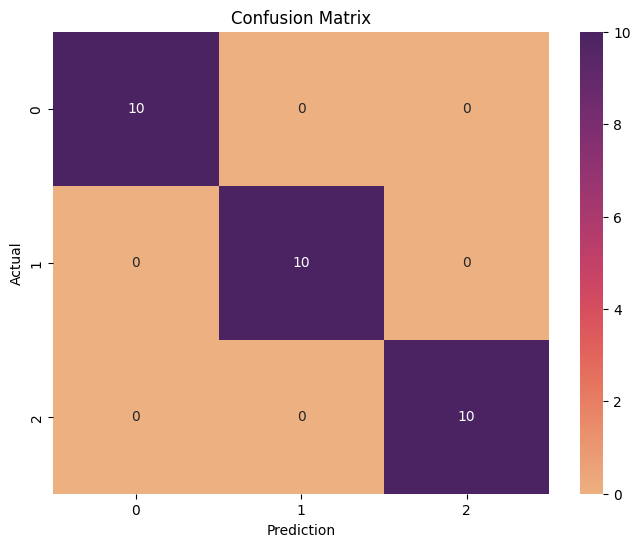

Class: Iris-Setosa
True Positives: 10
False Positives: 0
False Negatives: 0
True Negatives: 20

Class: Iris-Versicolor
True Positives: 10
False Positives: 0
False Negatives: 0
True Negatives: 20

Class: Iris-Virginica
True Positives: 10
False Positives: 0
False Negatives: 0
True Negatives: 20



In [118]:
confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        classes = "Iris-Setosa"
    elif name == 1:
        classes = "Iris-Versicolor"
    else:
        classes = "Iris-Virginica"
        
    print(f"Class: {classes}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### E.3 Precision

In [119]:
precision = TP / (TP + FP)
precision = np.mean(precision)
print(f"Precision: {precision}")

Precision: 1.0


### E.4 Recall

In [120]:
recall = TP / (TP + FN)
recall = np.mean(recall)
print(f"Recall: {recall}")

Recall: 1.0


### E.5 F-1 Score

In [121]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F-1 Score: {f1_score}")

F-1 Score: 1.0


### E.6 Model Predict (Visual)

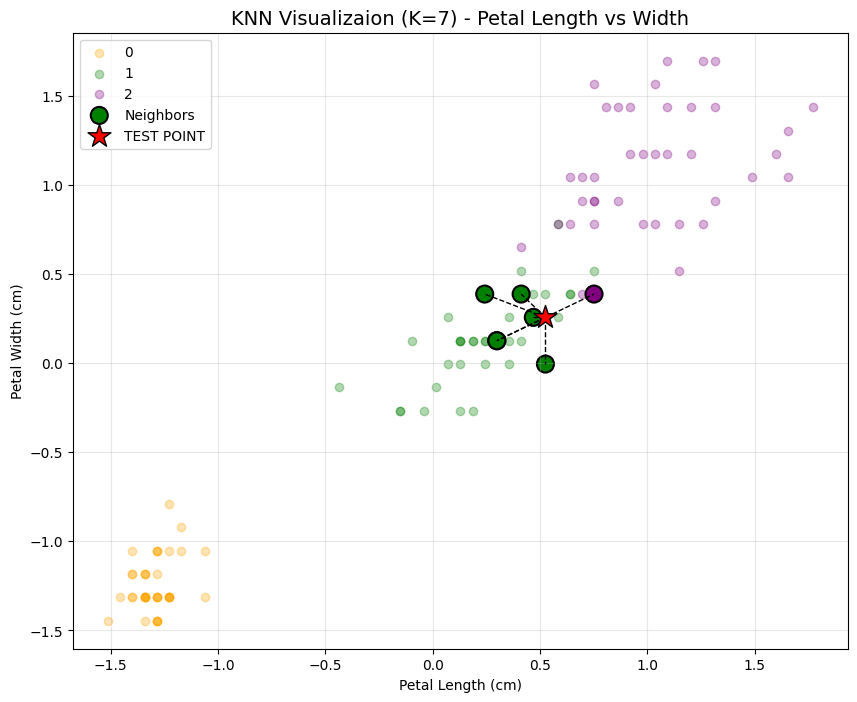

In [122]:
def visualize_knn_iris(X_train, y_train, test_data_point, k_neighbors=7):
    # --- 1. PERSIAPAN DATA (Biar aman formatnya) ---
    X_train_array = X_train.values
    y_train_array = y_train.values
    test_point_array = test_data_point.values

    feature_x_idx = 2 
    feature_y_idx = 3
    species_colors = {
        0: 'orange',
        1: 'green',
        2: 'purple'
    }

    # --- 2. HITUNG JARAK (Math Magic) ---
    # Hitung jarak Euclidean dari Test Point ke SEMUA data latih
    distances = np.sqrt(np.sum((X_train_array - test_point_array)**2, axis=1))
    nearest_indices = np.argsort(distances)[:k_neighbors]
    neighbors_X = X_train_array[nearest_indices]
    neighbors_y = y_train_array[nearest_indices]

    # np.random.seed(42) 
    # jitter = np.random.uniform(-0.05, 0.05, size=neighbors_X.shape)
    # neighbors_X = neighbors_X + jitter
    
    # --- 3. MULAI GAMBAR PLOT ---
    plt.figure(figsize=(10, 8))
    for species_name, color_code in species_colors.items():
        subset_data = X_train_array[y_train_array == species_name]
        plt.scatter(subset_data[:, feature_x_idx], subset_data[:, feature_y_idx], 
                    c=color_code, alpha=0.3, label=species_name)

    # B. Gambar Garis Laba-laba (Spider Lines)
    for i in range(k_neighbors):
        neighbor_x = neighbors_X[i, feature_x_idx]
        neighbor_y = neighbors_X[i, feature_y_idx]
        
        plt.plot([test_point_array[feature_x_idx], neighbor_x], 
                 [test_point_array[feature_y_idx], neighbor_y], 
                 color='black', linestyle='--', linewidth=1)

    # C. Gambar Titik Tetangga (Ditebalkan)
    # Warnai tetangga sesuai spesiesnya
    neighbor_colors = [species_colors[y] for y in neighbors_y]
    plt.scatter(neighbors_X[:, feature_x_idx], neighbors_X[:, feature_y_idx], 
                c=neighbor_colors, s=150, edgecolor='black', linewidth=1.5, label='Neighbors')

    # D. Gambar Titik Test (Bintang Merah)
    plt.scatter(test_point_array[feature_x_idx], test_point_array[feature_y_idx], 
                color='red', marker='*', s=300, edgecolor='black', label='TEST POINT', zorder=10)

    # Finishing Touch
    plt.title(f'KNN Visualizaion (K={k_neighbors}) - Petal Length vs Width', fontsize=14)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# --- CARA PAKAINYA ---
sample_test = X_test.iloc[10] 

# Panggil fungsinya
visualize_knn_iris(X_train, y_train, sample_test, k_neighbors=7)

### E.7 Model Evaluation (Visual)

In [127]:
X_test.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'SepalAreaCm', 'PetalAreaCm'],
      dtype='str')

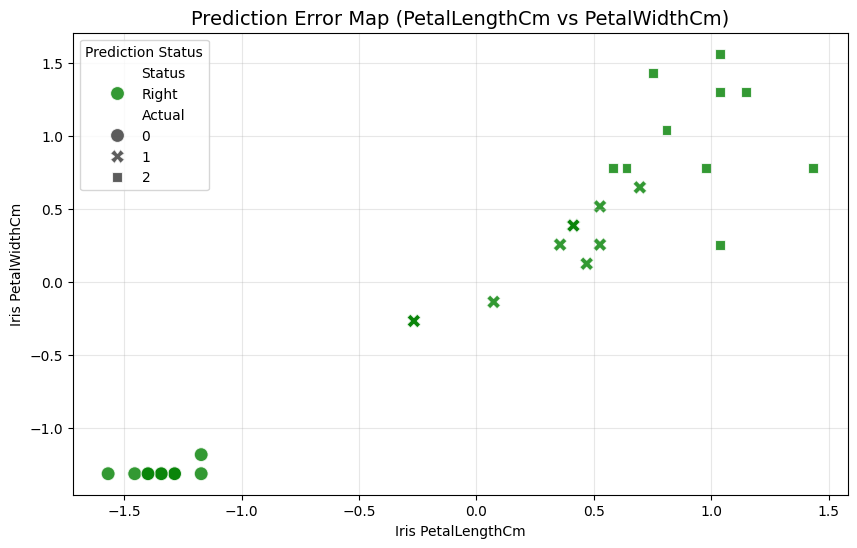

In [128]:
plot_data = pd.DataFrame({
    'PetalLengthCm': X_test.iloc[:, 2],
    'PetalWidthCm': X_test.iloc[:, 3],
    'Actual': y_test,
    'Prediction': test_predictions
})

plot_data['Status'] = np.where(plot_data['Actual'] == plot_data['Prediction'], 'Right', 'Wrong')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_data, 
    x='PetalLengthCm', 
    y='PetalWidthCm', 
    hue='Status',
    style='Actual',
    palette={'Right': 'green', 'Wrong': 'red'},
    s=100,
    alpha=0.8
)

plt.title('Prediction Error Map (PetalLengthCm vs PetalWidthCm)', fontsize=14)
plt.xlabel('Iris PetalLengthCm')
plt.ylabel('Iris PetalWidthCm')
plt.legend(title='Prediction Status')
plt.grid(True, alpha=0.3)
plt.show()

### E.8 ROC-AUC Visualization

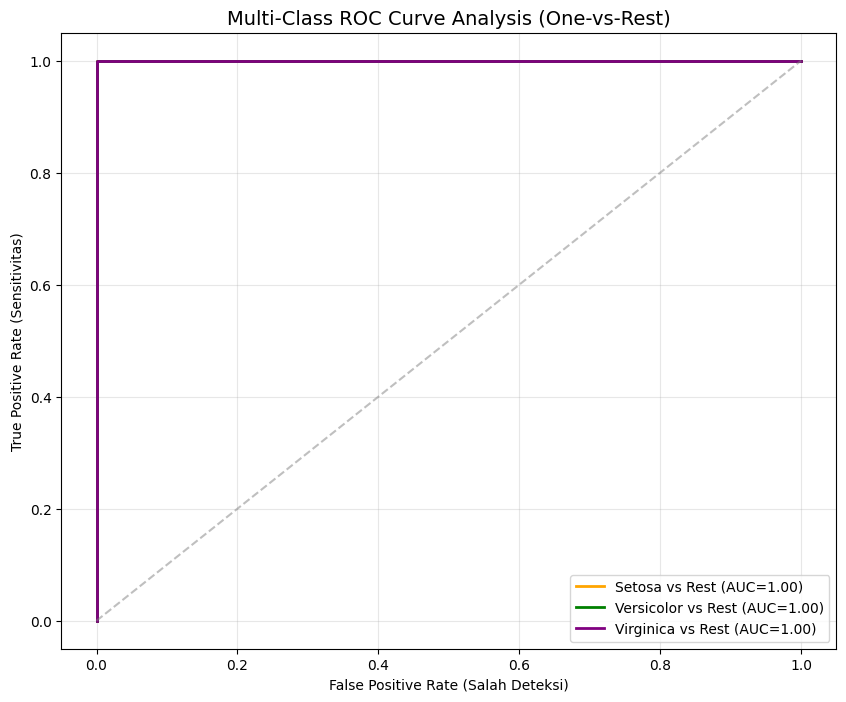

In [126]:
# --- 1. Fungsi Hitung Keyakinan (Probabilitas) ---
# UPDATE: Tambah parameter 'target_class' biar fleksibel
def get_probabilities(X_train, y_train, X_test, target_class, k=5):
    if hasattr(X_train, 'values'): X_train = X_train.values
    if hasattr(y_train, 'values'): y_train = y_train.values
    if hasattr(X_test, 'values'): X_test = X_test.values
        
    probs = []
    for row in X_test:
        # Hitung jarak (Manhattan/Euclidean sesuaikan dgn modelmu, disini Euclidean default)
        dists = np.sqrt(np.sum((X_train - row)**2, axis=1))
        
        # Ambil K tetangga
        idx_neighbors = np.argsort(dists)[:k]
        labels_neighbors = y_train[idx_neighbors]
        
        # Hitung: Berapa persen tetangga yang merupakan 'target_class'?
        prob = np.mean(labels_neighbors == target_class) 
        probs.append(prob)
        
    return np.array(probs)

# --- 2. Main Logic: Multi-Class ROC (One-vs-Rest) ---
plt.figure(figsize=(10, 8))

# Loop untuk setiap kelas (0, 1, 2)
classes = [0, 1, 2]
colors = ['orange', 'green', 'purple'] # Sesuaikan warna Iris
class_names = ['Setosa', 'Versicolor', 'Virginica']

for class_id, color, name in zip(classes, colors, class_names):
    
    # A. BINARIZE LABEL (Satu lawan Sisanya)
    # Anggap Class_ID saat ini = 1 (Positif), Sisanya = 0 (Negatif)
    y_test_binary = (y_test.values == class_id).astype(int)
    
    # B. Hitung Probabilitas Khusus Class ini
    y_probs = get_probabilities(X_train, y_train, X_test, target_class=class_id, k=5)
    
    # C. Hitung TPR & FPR manual
    thresholds = np.linspace(0, 1.1, 20)
    tpr_list = []
    fpr_list = []
    
    P = np.sum(y_test_binary == 1) # Total Positif Asli
    N = np.sum(y_test_binary == 0) # Total Negatif Asli (Gabungan sisa kelas)
    
    for t in thresholds:
        y_pred_temp = (y_probs >= t).astype(int)
        
        # TP: Prediksi 1 DAN Aslinya 1
        TP = np.sum((y_pred_temp == 1) & (y_test_binary == 1))
        # FP: Prediksi 1 TAPI Aslinya 0 (Salah satu dari 2 kelas lain)
        FP = np.sum((y_pred_temp == 1) & (y_test_binary == 0))
        
        tpr_list.append(TP / P if P > 0 else 0)
        fpr_list.append(FP / N if N > 0 else 0)
        
    # D. Hitung AUC
    auc_score = np.trapezoid(tpr_list[::-1], fpr_list[::-1])
    
    # E. Plot Garisnya
    plt.plot(fpr_list, tpr_list, color=color, linewidth=2, 
             label=f'{name} vs Rest (AUC={abs(auc_score):.2f})')

# --- 3. Finishing ---
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', alpha=0.5)
plt.title('Multi-Class ROC Curve Analysis (One-vs-Rest)', fontsize=14)
plt.xlabel('False Positive Rate (Salah Deteksi)')
plt.ylabel('True Positive Rate (Sensitivitas)')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

## F. GUI

### F.1 Tkinter

In [ ]:
import tkinter as tk
from tkinter import *

def predict():
    sepallen = float(input_sepallen.get())
    sepalwid = float(input_sepalwid.get())
    petallen = float(input_petallen.get())
    petalwid = float(input_petalwid.get())
    sepalare = float(input_sepalare.get())
    petalare = float(input_petalare.get())
    
    raw_input = np.array([sepallen, sepalwid, petallen, petalwid, sepalare, petalare])
    input_scaled = (raw_input - X_train_mean.values) / X_train_std.values
    result = model.predict([input_scaled])[0]
    if result == 0:
        result_name = 'Iris Setosa'
        result_color = '#8175ff'
    elif result == 1:
        result_name = 'Iris Versicolor'
        result_color = '#b432ff'
    else:
        result_name = 'Iris Virginica'
        result_color = '#7c5eff'
    
    PredictResult.config(text=result_name, fg=result_color)
    

root = tk.Tk()
root.title('K-Nearest Neighbors')
root.geometry('500x600')
root.config(bg="#B8B8B8")

Header = Frame(root, bg="#404040")
Header.pack(fill=X)
Title = Label(Header, text='Iris Species Prediction', font=('Segoe UI', 18, 'bold'), fg='#ffffff', bg="#404040")
Title.pack(pady=(20, 10))
Description = Label(Header, text='Iris Setosa | Iris Versicolor | Iris Virginica', font=('Segoe UI', 14, 'bold'), fg='#ffffff', bg="#404040")
Description.pack(pady=(5, 20))

Main = Frame(root, bg="#404040")
Main.pack(padx= 30, pady = 30)

Label(Main, text="Sepal Length (Cm)", bg="#404040", fg="white", font=("Segoe UI", 10, "bold")).pack()
input_sepallen = Entry(Main, width=50, justify='center')
input_sepallen.pack()

Label(Main, text="Sepal Width (Cm)", bg="#404040", fg="white", font=("Segoe UI", 10, "bold")).pack()
input_sepalwid = Entry(Main, width=50, justify='center')
input_sepalwid.pack()

Label(Main, text="Petal Length (Cm)", bg="#404040", fg="white", font=("Segoe UI", 10, "bold")).pack()
input_petallen = Entry(Main, width=50, justify='center')
input_petallen.pack()

Label(Main, text="Petal Width (Cm)", bg="#404040", fg="white", font=("Segoe UI", 10, "bold")).pack()
input_petalwid = Entry(Main, width=50, justify='center')
input_petalwid.pack()

Label(Main, text="Sepal Area (Cm)", bg="#404040", fg="white", font=("Segoe UI", 10, "bold")).pack()
input_sepalare = Entry(Main, width=50, justify='center')
input_sepalare.pack()

Label(Main, text="Petal Area (Cm)", bg="#404040", fg="white", font=("Segoe UI", 10, "bold")).pack()
input_petalare = Entry(Main, width=50, justify='center')
input_petalare.pack()

Result = Frame(root, bg="#404040")
Result.pack()
PredictButton = Button(Result, text="Predict Species", bg="#B8B8B8", fg="#131313", font=("Segoe UI", 10, "bold"), command=predict)
PredictButton.pack()
PredictResult = Label(text="-", font=("Segoe UI", 10, "bold"), fg="black")
PredictResult.pack(pady=10)

root.mainloop()

KeyboardInterrupt: 

: 

In [159]:
df_clean.tail(40)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalAreaCm,PetalAreaCm
110,6.5,3.2,5.1,2.0,2,20.80,10.20
111,6.4,2.7,5.3,1.9,2,17.28,10.07
112,6.8,3.0,5.5,2.1,2,20.40,11.55
113,5.7,2.5,5.0,2.0,2,14.25,10.00
114,5.8,2.8,5.1,2.4,2,16.24,12.24
115,6.4,3.2,5.3,2.3,2,20.48,12.19
116,6.5,3.0,5.5,1.8,2,19.50,9.90
117,7.7,3.8,6.7,2.2,2,29.26,14.74
118,7.7,2.6,6.9,2.3,2,20.02,15.87
119,6.0,2.2,5.0,1.5,2,13.20,7.50
